# Spotify API {.unnumbered}

**Goal.** Using machine learning to predict the mood of music from song lyrics and audio features.


The following project uses Python implementation that extracts and analyzes information about songs in a Spotify playlist using the Spotify Web API. We then use the `lyricsgenius` package to search for and save the lyrics of specific songs from the Genius lyrics website. We then implement a Python script that contains several functions for cleaning song lyrics and determining the sentiment of the lyrics.


In summary, the code retrieves and cleans song lyrics, removes stopwords and performs lemmatization, and finally determines the sentiment of the lyrics using pre-trained models for sentiment analysis.

In [54]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from IPython.core.display import HTML

client_id = "3899576b5fcb4c458beba2cce99aa1b6"
client_secret = "092a0b9b1e074abba82ce61ba6137aea"
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id, client_secret))


## Display Spotify Playlists

In [55]:
username = 'spotify'
my_playlists = sp.user_playlists(username)
playlist_df = []
# Loop through list of response dictionaries
for item in my_playlists['items']:
    playlist_id = item['id']
    playlist_name = item['name']
    description = item['description']
    thumbnail = item['images'][0]['url']
    total = item['tracks']['total']
    playlist_df.append([thumbnail, playlist_name, playlist_id, description, total])
    
playlist_df = pd.DataFrame(playlist_df, columns =['thumbnail', 'playlist_name','playlist_id', 'description', 'total']).head()

# Converting links to html tags
def path_to_image_html(path):
    return f'<img src="{path}" width="40" >'

# Rendering the dataframe as HTML table
HTML(playlist_df.to_html(escape=False,formatters=dict(thumbnail=path_to_image_html)))

------------------------------------------


## Get Tracks from Playlist


The following code allows you to extract various details about songs in a Spotify playlist, such as their names, track IDs, album names, artist names, audio features, and playlist information. The extracted information is then organized and displayed in a pandas DataFrame.

In [56]:
# Get playlist song features and artist info
def playlist_features(id, artist_id, playlist_id):
    
    # Create Spotify API client variables
    meta = sp.track(id)
    audio_features = sp.audio_features(id)
    artist_info = sp.artist(artist_id)
    playlist_info = sp.playlist(playlist_id)

    # Metadata
    name = meta['name']
    track_id = meta['id']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    artist_id = meta['album']['artists'][0]['id']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']

    # Main artist name, popularity, genre
    artist_pop = artist_info["popularity"]
    artist_genres = artist_info["genres"]

    # Track features
    acousticness = audio_features[0]['acousticness']
    danceability = audio_features[0]['danceability']
    energy = audio_features[0]['energy']
    instrumentalness = audio_features[0]['instrumentalness']
    liveness = audio_features[0]['liveness']
    loudness = audio_features[0]['loudness']
    speechiness = audio_features[0]['speechiness']
    tempo = audio_features[0]['tempo']
    valence = audio_features[0]['valence']
    key = audio_features[0]['key']
    mode = audio_features[0]['mode']
    time_signature = audio_features[0]['time_signature']
    
    # Basic playlist info
    playlist_name = playlist_info['name']

    return [name, track_id, album, artist, artist_id, release_date, length, popularity, 
            artist_pop, artist_genres, acousticness, danceability, 
            energy, instrumentalness, liveness, loudness, speechiness, 
            tempo, valence, key, mode, time_signature, playlist_name]

In [57]:
def get_playlist_tracks(playlist_URI):
    tracks = []
    results = sp.playlist_tracks(playlist_URI)
    tracks = results["items"]
    while results["next"]:
        results = sp.next(results)
        tracks.extend(results["items"])
    return tracks

Choose a specific playlist to analyze by copying the URL from the Spotify Player interface. Using that link, the following code uses the playlist_tracks method to retrieve a list of IDs and corresponding artists for each track from the playlist. 


In [58]:
# Spotify playlist url
playlist_ids = []
track_ids = []
artist_uris = []

# Extract song ids and artists from playlist
playlist_URI = "37i9dQZF1DXcBWIGoYBM5M"
for i in get_playlist_tracks(playlist_URI):
    track_ids.append(i["track"]["id"])
    artist_uris.append(i["track"]["artists"][0]["uri"])
    playlist_ids.append(playlist_URI)

The following code loops through each track ID in the playlist and extracts additional song information by calling the function we created above. From there, we can create a pandas data frame by passing in the extracted information and giving the column header names we want. 

In [59]:
# Loop over track ids
all_tracks = [
    playlist_features(track_ids[i], artist_uris[i], playlist_ids[i])
    for i in range(len(track_ids))
]

In [112]:
# Create dataframe
df = pd.DataFrame(
    all_tracks, columns=['name', 'track_id', 'album', 'artist', 'artist_id','release_date',
                     'length', 'popularity', 'artist_pop', 'artist_genres',
                     'acousticness', 'danceability', 'energy',
                     'instrumentalness', 'liveness', 'loudness',
                     'speechiness', 'tempo', 'valence', 'key', 'mode',
                     'time_signature', 'playlist'])

df[['name', 'artist', 'release_date', 'popularity', 
    'artist_pop', 'artist_genres', 'acousticness', 
    'danceability', 'energy', 'instrumentalness', 
    'liveness', 'loudness', 'speechiness', 
    'tempo', 'valence', 'playlist']].head(10)

name  \
0                      What Was I Made For? [From The Motion Picture "Barbie"]   
1                                                                      vampire   
2                                                                 Cruel Summer   
3  Popular (with Playboi Carti & Madonna) - Music from the HBO Original Series   
4                                      Dance The Night (From Barbie The Album)   
5                                                               WHERE SHE GOES   
6                             Barbie World (with Aqua) [From Barbie The Album]   
7                                                                    Kill Bill   
8                                                                    As It Was   
9                                                                    Super Shy   

           artist release_date  popularity  artist_pop  \
0   Billie Eilish   2023-07-13          84          86   
1  Olivia Rodrigo   2023-06-30          98          84   
2    Taylor Swift   2019-08-23          99         100   
3      The Weeknd   2023-06-02          91          93   
4        Dua Lipa   2023-05-25          94          85   
5       Bad Bunny   2023-05-18         100          94   
6     Nicki Minaj   2023-06-23          91          85   
7             SZA   2022-12-08          95          87   
8    Harry Styles   2022-03-31          93          86   
9        NewJeans   2023-07-07          91          80   

                                    artist_genres  acousticness  danceability  \
0                      [art pop, electropop, pop]        0.9590         0.444   
1                                           [pop]        0.1690         0.511   
2                                           [pop]        0.1170         0.552   
3  [canadian contemporary r&b, canadian pop, pop]        0.0569         0.855   
4                        [dance pop, pop, uk pop]        0.0207         0.671   
5         [reggaeton, trap latino, urbano latino]        0.1430         0.652   
6             [hip pop, pop, queens hip hop, rap]        0.5190         0.770   
7                                 [pop, r&b, rap]        0.0521         0.644   
8                                           [pop]        0.3420         0.520   
9                       [k-pop, k-pop girl group]        0.1800         0.776   

   energy  instrumentalness  liveness  loudness  speechiness    tempo  \
0  0.0911          0.000001     0.098   -17.665       0.0307   78.403   
1  0.5320          0.000000     0.311    -5.745       0.0560  137.827   
2  0.7020          0.000021     0.105    -5.707       0.1570  169.994   
3  0.6780          0.000037     0.412    -6.276       0.1890   99.029   
4  0.8450          0.000000     0.329    -4.930       0.0480  110.056   
5  0.8000          0.629000     0.112    -4.019       0.0614  143.978   
6  0.5800          0.000127     0.233    -8.393       0.2470  144.072   
7  0.7350          0.144000     0.161    -5.747       0.0391   88.980   
8  0.7310          0.001010     0.311    -5.338       0.0557  173.930   
9  0.8170          0.000034     0.146    -6.018       0.0748  149.921   

   valence           playlist  
0    0.142  Today's Top Hits   
1    0.322  Today's Top Hits   
2    0.564  Today's Top Hits   
3    0.852  Today's Top Hits   
4    0.775  Today's Top Hits   
5    0.234  Today's Top Hits   
6    0.753  Today's Top Hits   
7    0.418  Today's Top Hits   
8    0.662  Today's Top Hits   
9    0.515  Today's Top Hits

### Top Artist Genres

In [61]:
genres_dict = {}
for x in df.artist_genres:
    for ii in x:
        if ii in genres_dict:
            genres_dict[ii] += 1
        else:
            genres_dict[ii] = 1
print(genres_dict)

# Convert Dictionary to Dataframe
df_genres = pd.DataFrame(genres_dict.items(), columns=['Genre', 'Freq']).sort_values('Freq', ascending=False)
df_genres = df_genres.reset_index(drop = True)

{'art pop': 2, 'electropop': 1, 'pop': 24, 'canadian contemporary r&b': 2, 'canadian pop': 2, 'dance pop': 5, 'uk pop': 3, 'reggaeton': 3, 'trap latino': 4, 'urbano latino': 4, 'hip pop': 1, 'queens hip hop': 1, 'rap': 8, 'r&b': 3, 'k-pop': 2, 'k-pop girl group': 2, 'afrobeats': 2, 'nigerian pop': 1, 'hip hop': 3, 'atl hip hop': 1, 'melodic rap': 2, 'trap': 2, 'dfw rap': 1, 'big room': 2, 'edm': 3, 'pop dance': 2, 'bedroom pop': 2, 'rap canario': 1, 'chicago drill': 1, 'chicago rap': 1, 'drill': 1, 'gen z singer-songwriter': 2, 'singer-songwriter pop': 3, 'pop reggaeton': 1, 'colombian pop': 1, 'contemporary country': 2, 'country': 1, 'piano rock': 1, 'australian pop': 1, 'viral pop': 1, 'alternative r&b': 1, 'modern indie pop': 1, 'pov: indie': 2, 'corrido': 1, 'corridos tumbados': 1, 'sad sierreno': 1, 'sierreno': 1, 'bedroom r&b': 1, 'alternative pop rock': 1, 'electro house': 1, 'house': 1, 'progressive house': 1, 'uk dance': 1, 'electra': 1, 'float house': 1, 'uk hip hop': 1}


In [62]:
from IPython.display import set_matplotlib_formats
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = (8, 5) # Set default figure size.
plt.rc('font', family='Roboto') # Set default font family

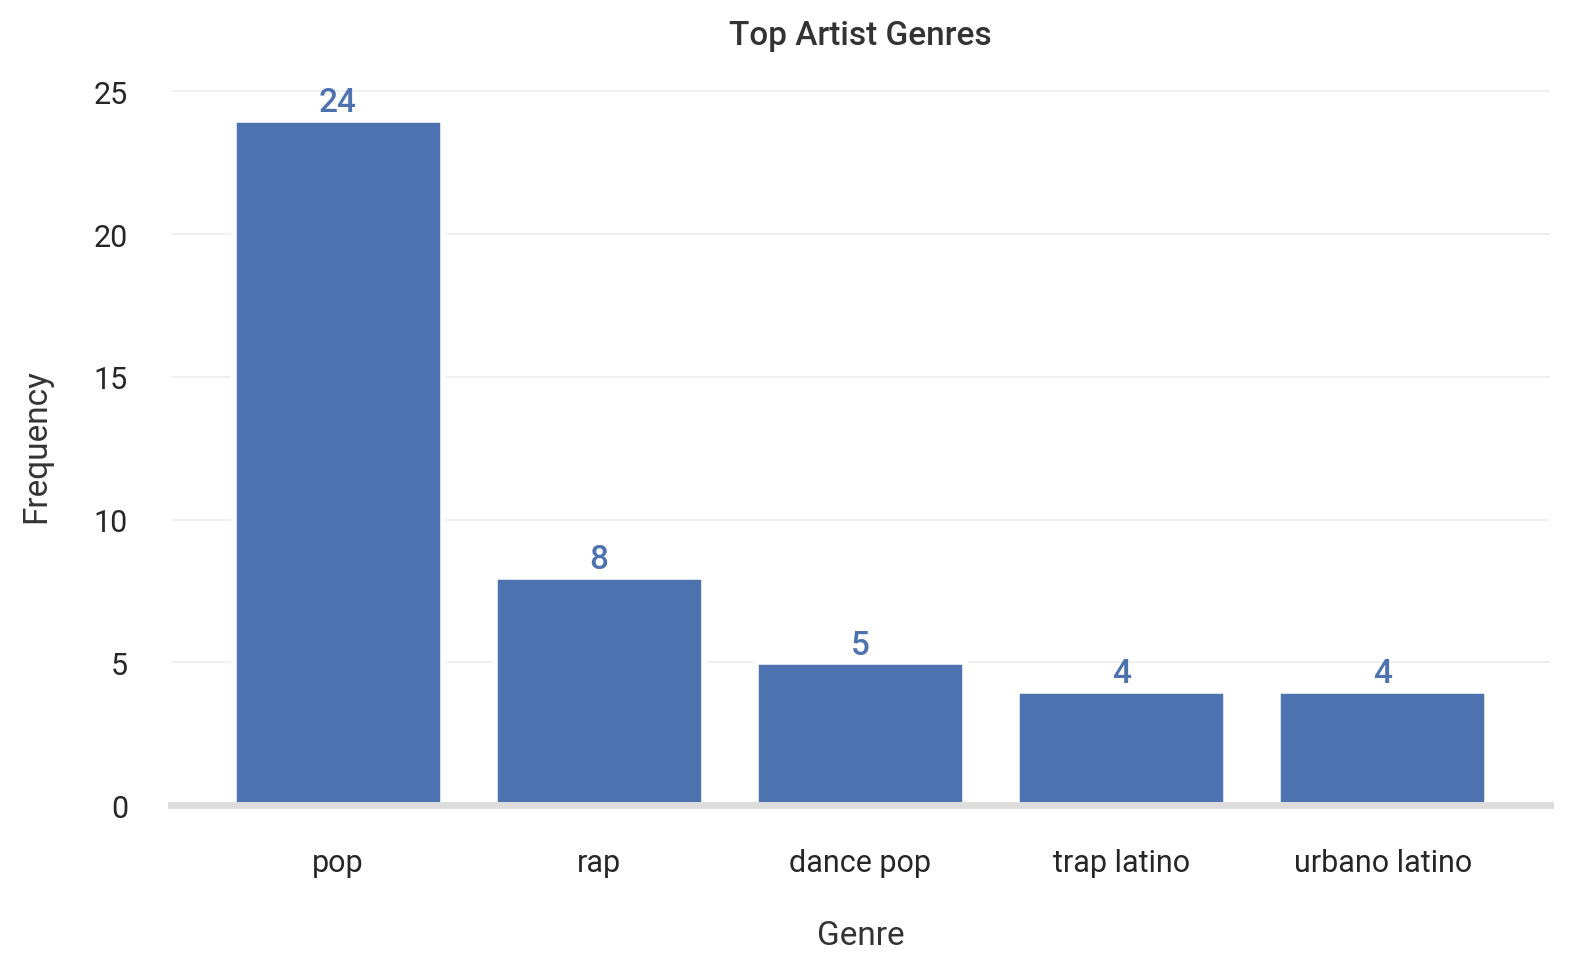

In [63]:
df_genres2 = df_genres.head()
fig, ax = plt.subplots()

# Save the chart so we can loop through the bars below.
bars = ax.bar(
    x=df_genres2['Genre'],
    height=df_genres2['Freq'])

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )

# Add labels and a title.
ax.set_xlabel('Genre', labelpad=15, color='#333333')
ax.set_ylabel('Frequency', labelpad=15, color='#333333')
ax.set_title('Top Artist Genres', pad=15, color='#333333',
             weight='bold')

fig.tight_layout()


In [111]:
import plotly.tools as tls
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import chart_studio.plotly as py

## convert and plot in plotly
#plotly_fig = tls.mpl_to_plotly(fig) ## convert 
#iplot(plotly_fig)

#import mpld3
#mpld3.display(fig)

-------

# Genius API


The given code is a Python script that contains several functions for cleaning song lyrics and determining the sentiment of the lyrics.

In [66]:
import lyricsgenius
import requests
from bs4 import BeautifulSoup

genius = lyricsgenius.Genius("epFCxujgBe-Y6WrkZedI8kerKxiCpR6Rh0DAHYNlKDf9B4H1nXTdZIkj7krNUHVV")

# song = genius.search_song("Too Many Nights", "Metro Boomin")
song = genius.search_song("No Good", "Juice WRLD")
# song.save_lyrics()

Searching for "No Good" by Juice WRLD...


Done.


### 1. Regex and Profanity Filter


The following function essentially takes a song name and artist, searches for the lyrics of the song, cleans the lyrics by removing profanity and certain characters/patterns, and returns a list of cleaned lyrics with non-ASCII characters removed.

In [67]:
import re
from profanity import profanity
from better_profanity import profanity as profanity2

In [68]:
def clean_song_lyrics(song_name, song_artist):
    
    song_genius = genius.search_song(song_name, song_artist)
    clean_lyrics = song_genius.lyrics.partition('Lyrics')[2].lower()
    clean_lyrics = profanity.censor(clean_lyrics) # censored_text
    clean_lyrics = re.sub(r"[,\(\)\?\!\.\$\#\@\%]", "", clean_lyrics)
    clean_lyrics = re.sub(r"[\[].*?[\]]", "", clean_lyrics)
    clean_lyrics = re.sub(r"\d+embed", "", clean_lyrics)
    clean_lyrics = re.sub(r'\"', '', clean_lyrics)

    clean_lyrics = profanity2.censor(clean_lyrics) # censored_text
    clean_lyrics = re.sub(r"[\*]", "", clean_lyrics)
    
    clean_lyrics_decode = []
    for i in (clean_lyrics.split()):
        #encode() method
        strencode = i.encode("ascii", "ignore")
        #decode() method
        strdecode = strencode.decode()
        clean_lyrics_decode.append(strdecode)

    return clean_lyrics_decode

### 2. Removing Stop Words

In [69]:
#import spacy
#import nltk
#import gensim
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [70]:
def remove_stopwords_lyrics(clean_lyrics_decode):
    stopword = stopwords.words('english')
    stopword.extend(["i'm", "i'll", "'ll", "i'ma"])
    removing_stopwords = [word for word in clean_lyrics_decode if word not in stopword]
    wnl = WordNetLemmatizer()
    return [wnl.lemmatize(word) for word in removing_stopwords] # lemmatized_word
    

--------------


## NLP

Using pipeline class to make predictions from models available in the Hub

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [71]:
import transformers
from transformers import pipeline
#import tensorflow as tf
## python -m pip install "tensorflow<2.11"
# python -m pip install "protobuf<3.2"

classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)
classifier2 = pipeline("text-classification",model='cardiffnlp/twitter-roberta-base-sentiment', return_all_scores=True)
classifier3 = pipeline("sentiment-analysis", return_all_scores=True)

c:\Users\Hannah Luebbering\.conda\envs\cse160\lib\site-packages\transformers\pipelines\text_classification.py:107: UserWarning:

`return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Distilbert-base-uncased-emotion is a model fine-tuned for detecting emotions in texts, including sadness, joy, love, anger, fear and surprise

In [72]:
def get_lyric_sentiment(cleaned_lyrics):
    song_score = {}

    x = ' '.join(cleaned_lyrics)
    
    # classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)
    prediction = classifier(x, truncation = True)
    for j in prediction[0]:
        song_score[j['label']] = j['score']
    
    #classifier2 = pipeline("text-classification",model='cardiffnlp/twitter-roberta-base-sentiment', return_all_scores=True)
    prediction2 = classifier2(x, truncation=True, max_length=512)
    for k in prediction2[0]:
        song_score[k['label']] = k['score']
        
    #classifier3 = pipeline("sentiment-analysis", return_all_scores=True)
    prediction3 = classifier3(x, truncation=True)
    for k3 in prediction3[0]:
        song_score[k3['label']] = k3['score']
        
    return song_score

How to handle sequences longer than 512 tokens
Exception encountered when calling layer 'embeddings'

---------------------


# Putting it All Together

In [73]:
lyrics_dict = {}
dict_ls = []

for i in range(len(df)):
    song_name = df['name'][i].partition(' (')[0]
    artist_name = df['artist'][i]
    track_lyrics = clean_song_lyrics(song_name, artist_name)
    track_lyrics = remove_stopwords_lyrics(track_lyrics)
    
    for k in (track_lyrics):
        if k in lyrics_dict:
            lyrics_dict[k] += 1
        else:
            lyrics_dict[k] = 1
            
    sent_score = get_lyric_sentiment(track_lyrics)
    sent_score['track_name'] = song_name
    sent_score['artist_name'] = artist_name
    sent_score['release_date'] = df['release_date'][i]
    sent_score['length'] = df['length'][i]
    sent_score['popularity'] = df['popularity'][i]
    sent_score['artist_pop'] = df['artist_pop'][i]
    sent_score['artist_genres'] = df['artist_genres'][i]
    sent_score['acousticness'] = df['acousticness'][i]
    sent_score['danceability'] = df['danceability'][i]
    sent_score['energy'] = df['energy'][i]
    sent_score['instrumentalness'] = df['instrumentalness'][i]
    sent_score['liveness'] = df['liveness'][i]
    sent_score['loudness'] = df['loudness'][i]
    sent_score['speechiness'] = df['speechiness'][i]
    sent_score['tempo'] = df['tempo'][i]
    sent_score['valence'] = df['valence'][i]
    
    dict_ls.append(sent_score)

Searching for "What Was I Made For? [From The Motion Picture "Barbie"]" by Billie Eilish...
Done.
Searching for "vampire" by Olivia Rodrigo...
Done.
Searching for "Cruel Summer" by Taylor Swift...
Done.
Searching for "Popular" by The Weeknd...
Done.
Searching for "Dance The Night" by Dua Lipa...
Done.
Searching for "WHERE SHE GOES" by Bad Bunny...
Done.
Searching for "Barbie World" by Nicki Minaj...
Done.
Searching for "Kill Bill" by SZA...
Done.
Searching for "As It Was" by Harry Styles...
Done.
Searching for "Super Shy" by NewJeans...
Done.
Searching for "Flowers" by Miley Cyrus...
Done.
Searching for "Calm Down" by Rema...
Done.
Searching for "Calling" by Metro Boomin...
Done.
Searching for "fukumean" by Gunna...
Done.
Searching for "Attention" by Doja Cat...
Done.
Searching for "Seven" by Jung Kook...
Done.
Searching for "Cupid - Twin Ver." by FIFTY FIFTY...
Done.
Searching for "Chemical" by Post Malone...
Done.
Searching for "People" by Libianca...
Done.
Searching for "LALA" by My

In [74]:
df_final = pd.DataFrame(dict_ls)
df_final = df_final[['track_name', 'artist_name', 'release_date', 'length', 'popularity', 
         'artist_pop', 'artist_genres', 'acousticness', 'danceability', 'energy',
         'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
         'sadness', 'joy', 'love', 'anger', 'fear', 'surprise', 'LABEL_0',
         'LABEL_1', 'LABEL_2', 'NEGATIVE', 'POSITIVE']]

# df_final.to_csv('top_songs_us.csv', index=False)

In [75]:
df_final.head(3)

track_name     artist_name  \
0  What Was I Made For? [From The Motion Picture "Barbie"]   Billie Eilish   
1                                                  vampire  Olivia Rodrigo   
2                                             Cruel Summer    Taylor Swift   

  release_date  length  popularity  artist_pop               artist_genres  \
0   2023-07-13  222369          84          86  [art pop, electropop, pop]   
1   2023-06-30  219724          98          84                       [pop]   
2   2019-08-23  178426          99         100                       [pop]   

   acousticness  danceability  energy  ...       joy      love     anger  \
0         0.959         0.444  0.0911  ...  0.197081  0.009966  0.345436   
1         0.169         0.511  0.5320  ...  0.993057  0.000612  0.001648   
2         0.117         0.552  0.7020  ...  0.241193  0.017412  0.405512   

       fear  surprise   LABEL_0   LABEL_1   LABEL_2  NEGATIVE  POSITIVE  
0  0.179204  0.008392  0.095024  0.854509  0.050466  0.971982  0.028018  
1  0.001187  0.000837  0.727187  0.240037  0.032776  0.998202  0.001798  
2  0.024407  0.003616  0.287019  0.607944  0.105037  0.994126  0.005874  

[3 rows x 27 columns]

In summary, the code retrieves and cleans song lyrics, removes stopwords and performs lemmatization, and finally determines the sentiment of the lyrics using pre-trained models for sentiment analysis.



### Visualizing the Data



In [76]:
## Set Default Plot Chart Style Configurations
from IPython.display import set_matplotlib_formats
import seaborn as sns

pd.set_option('display.max_colwidth', None)
sns.set(style="whitegrid")
sns.set_context("poster", font_scale=.5, rc={"grid.linewidth": 0.6})
sns.set_style({'font.family': 'Roboto'})


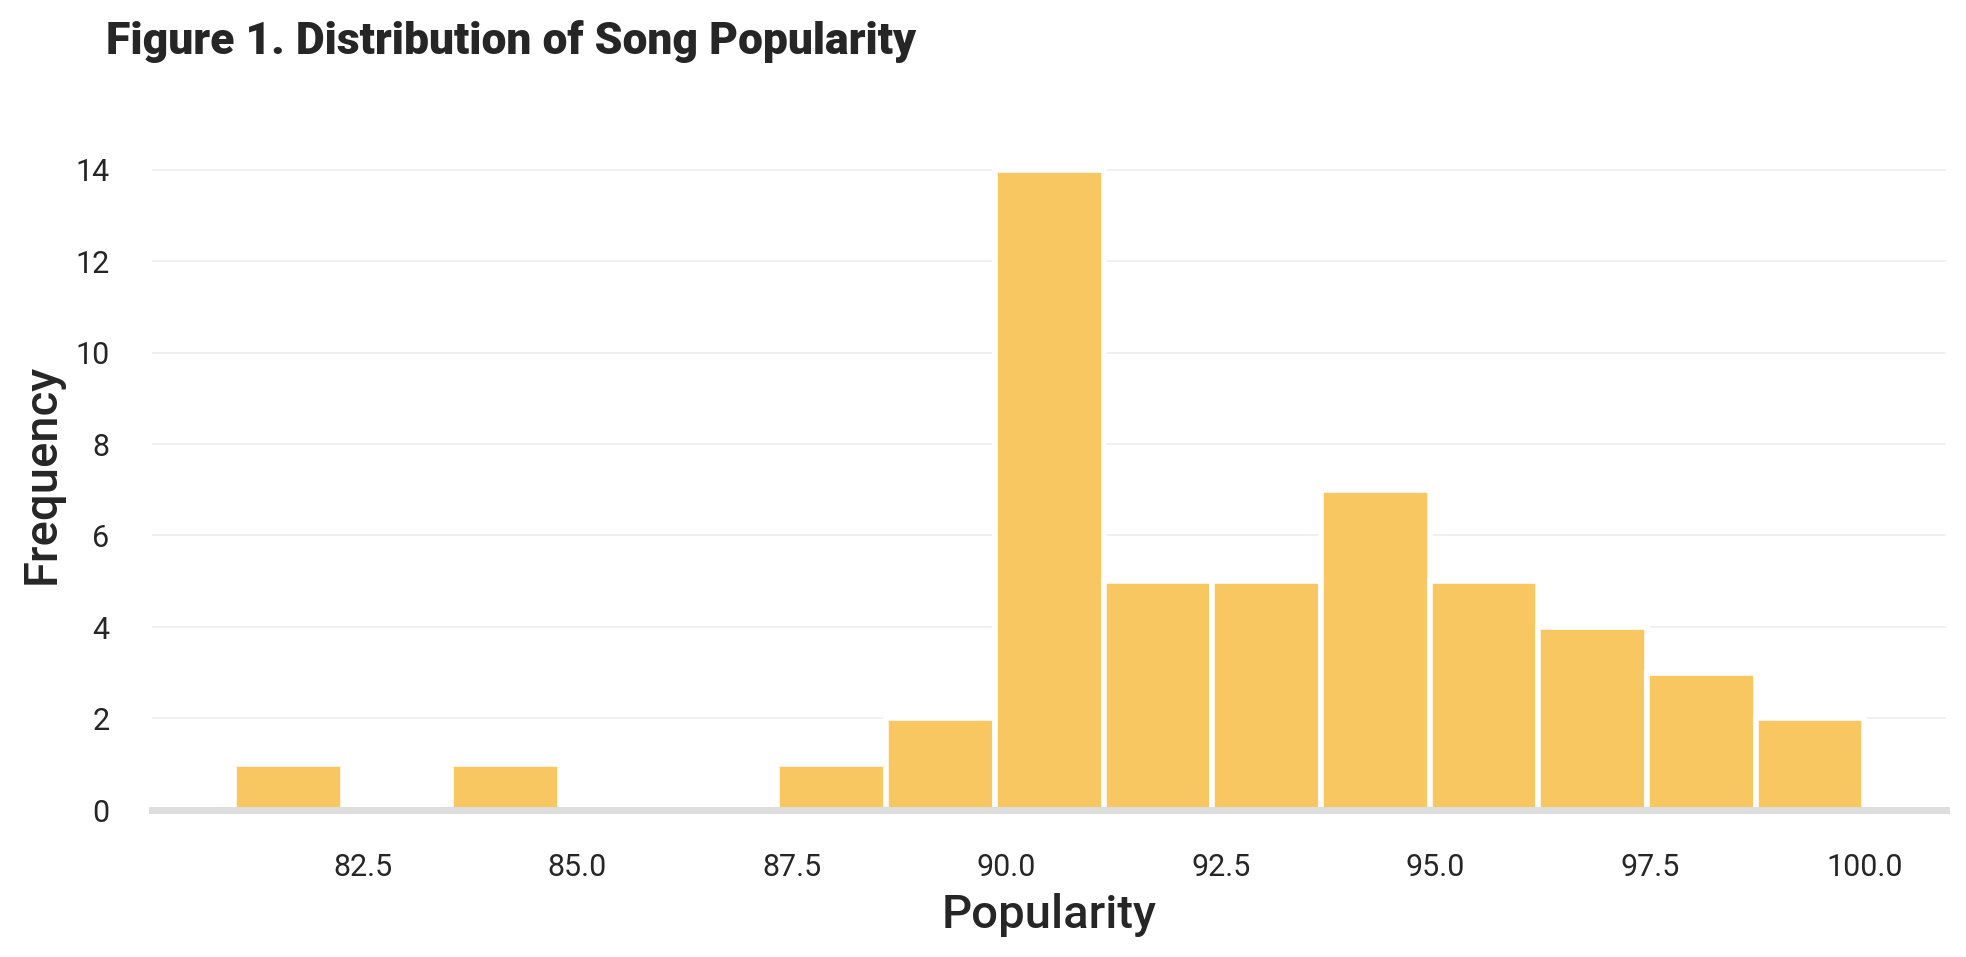

In [77]:
fig_hist = plt.figure(figsize = (10,5), dpi =100)
plt.title("Figure 1. Distribution of Song Popularity", weight='heavy',y =1.1, x=0.2).set_fontsize('16')
z = sns.histplot(data=df_final, x="popularity", color="#F9C762", alpha = 1.0,bins=15)
sns.despine(left=True, bottom=False)
z.spines['bottom'].set_color('#DDDDDD')
z.yaxis.grid(True, color='#EEEEEE')
z.xaxis.grid(False)
plt.xlabel("Popularity", size=17, weight=500)
plt.ylabel("Frequency", size=17, weight=500)
plt.tight_layout()
#plt.savefig("hold_times_dist.png", format="png", dpi=1200)
plt.show()

In [78]:
#plotly_fig2 = tls.mpl_to_plotly(fig_hist) ## convert 
#iplot(plotly_fig2)

#### Twitter-roBERTa-base for Sentiment Analysis

This is a roBERTa-base model trained on ~58M tweets and finetuned for sentiment analysis with the TweetEval benchmark. This model is suitable for English (for a similar multilingual model, see XLM-T).

Reference Paper: TweetEval (Findings of EMNLP 2020).
Git Repo: Tweeteval official repository.
Labels: 0 -> Negative; 1 -> Neutral; 2 -> Positive

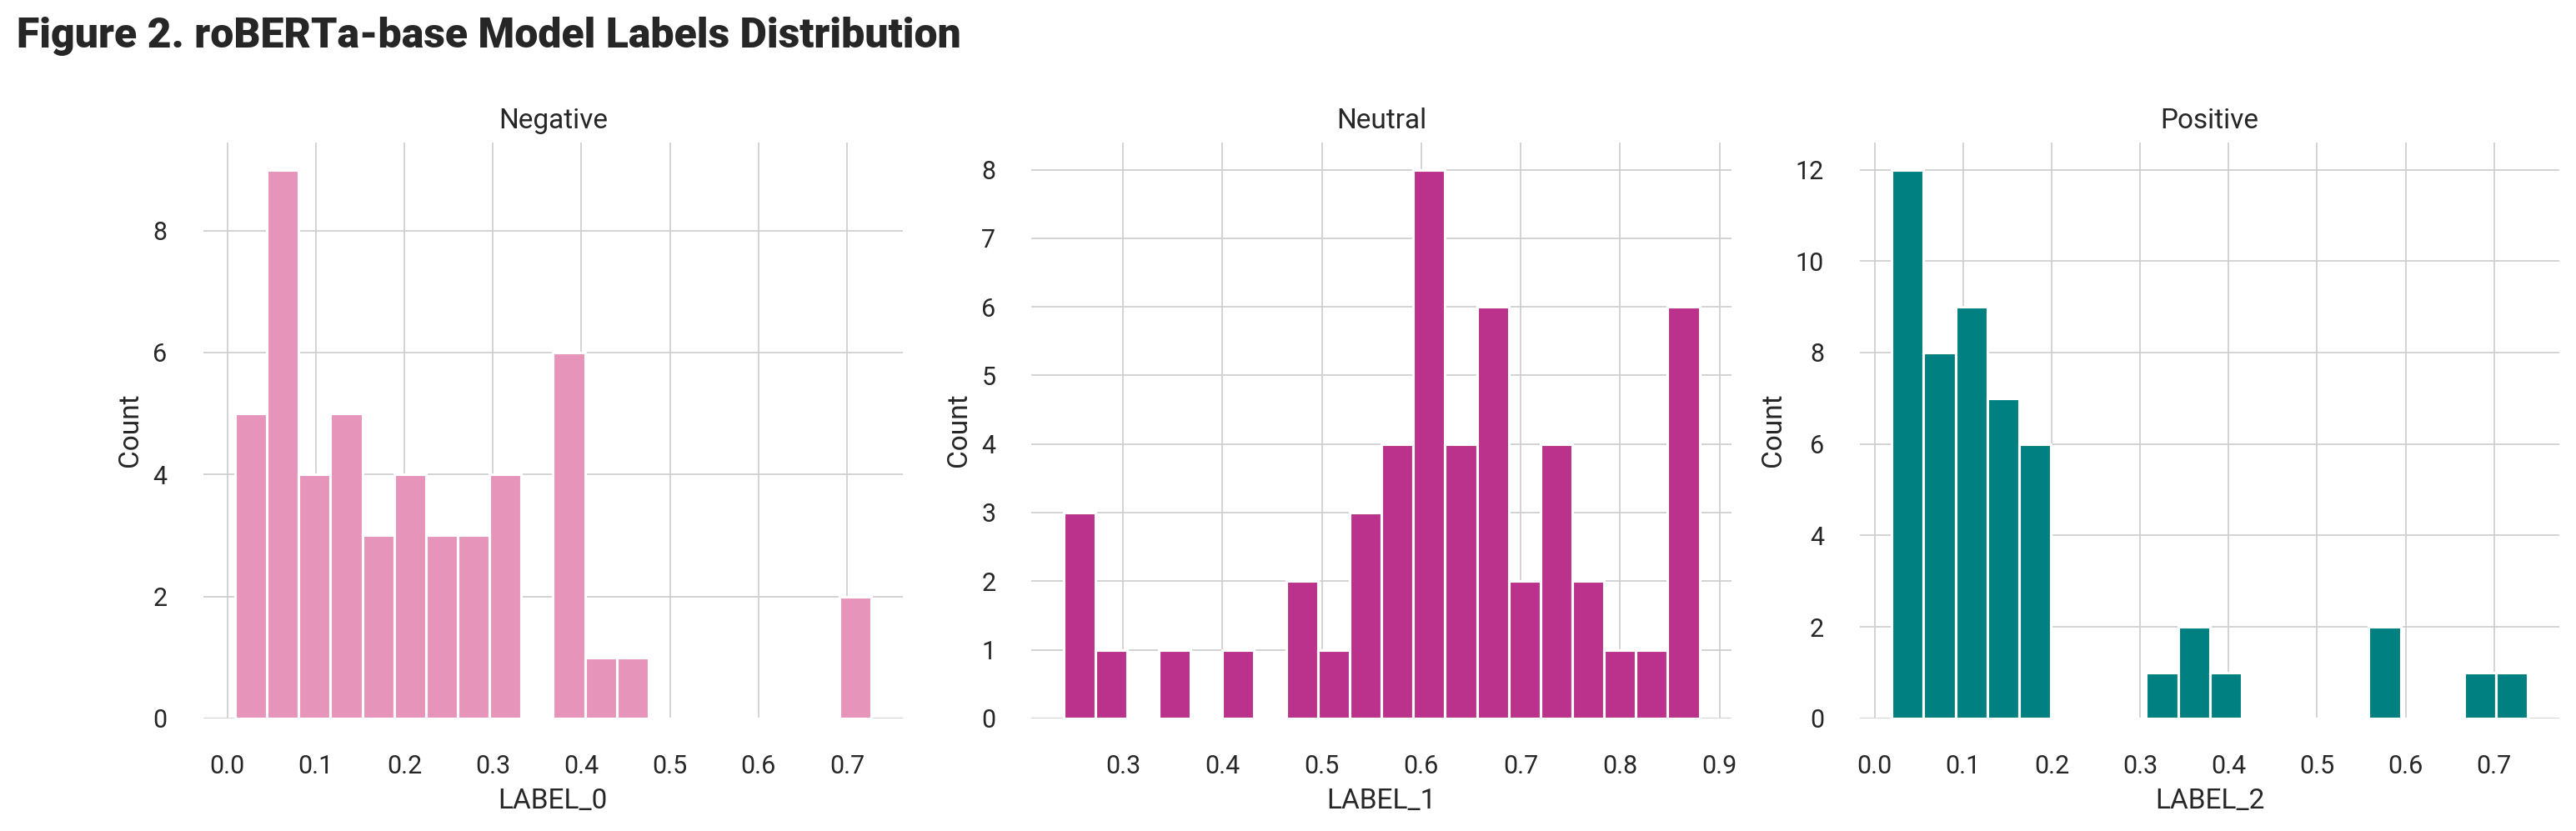

In [79]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Figure 2. roBERTa-base Model Labels Distribution", weight='heavy',y =0.99, x=0.16).set_fontsize('18')

sns.histplot(data=df_final, x=df_final[df_final['LABEL_0'].notnull()]['LABEL_0'], color="#e794bb", alpha = 1.0, ax=axs[0], bins=20)
axs[0].set_title("Negative")
sns.histplot(data=df_final, x=df_final[df_final['LABEL_1'].notnull()]['LABEL_1'], color="#ba328b", alpha = 1.0, ax=axs[1], bins=20)
axs[1].set_title("Neutral")
sns.histplot(data=df_final, x=df_final[df_final['LABEL_2'].notnull()]['LABEL_2'], color="teal", alpha = 1.0, ax=axs[2], bins=20)
axs[2].set_title("Positive")

sns.despine(left=True, bottom=True)
fig.tight_layout()
# plt.savefig("_static/images/brand_dist.png", format="png", dpi=1200)
plt.show()

#### Correlations Matrix

Next, we find the Pearson correlations matrix by using the pandas command `df.corr()`. We then plot the correlation matrix with the seaborn heatmap.


In [80]:
track_sentiment_df = df_final[['track_name', 'artist_name',
           'acousticness', 'danceability', 'energy', 
           'instrumentalness', 'loudness', 
           'speechiness', 'tempo', 'valence', 
           'sadness', 'joy', 'love', 'anger', 'fear', 'surprise',
           'LABEL_0', 'LABEL_1', 'LABEL_2', 'NEGATIVE', 'POSITIVE']]

# Find the pearson correlations matrix
corr = track_sentiment_df.corr(method = 'pearson')

plt.figure(figsize=(10,8), dpi =500)
g = sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5, annot_kws={"size": 8}, cbar_kws={"shrink": .52})

g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 9,family='Roboto')
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 9,family='Roboto')
plt.title('Sentiment Analysis Model Labels Correlation Matrix')

#plt.savefig('heatmap.png')              
plt.show()

In [81]:
#fig, ax = plt.subplots(figsize=(10,6))
#sns.heatmap(corr, center=0, cmap='Blues')
#ax.set_title('Multi-Collinearity of Lyric NLP Sentiment Analysis')




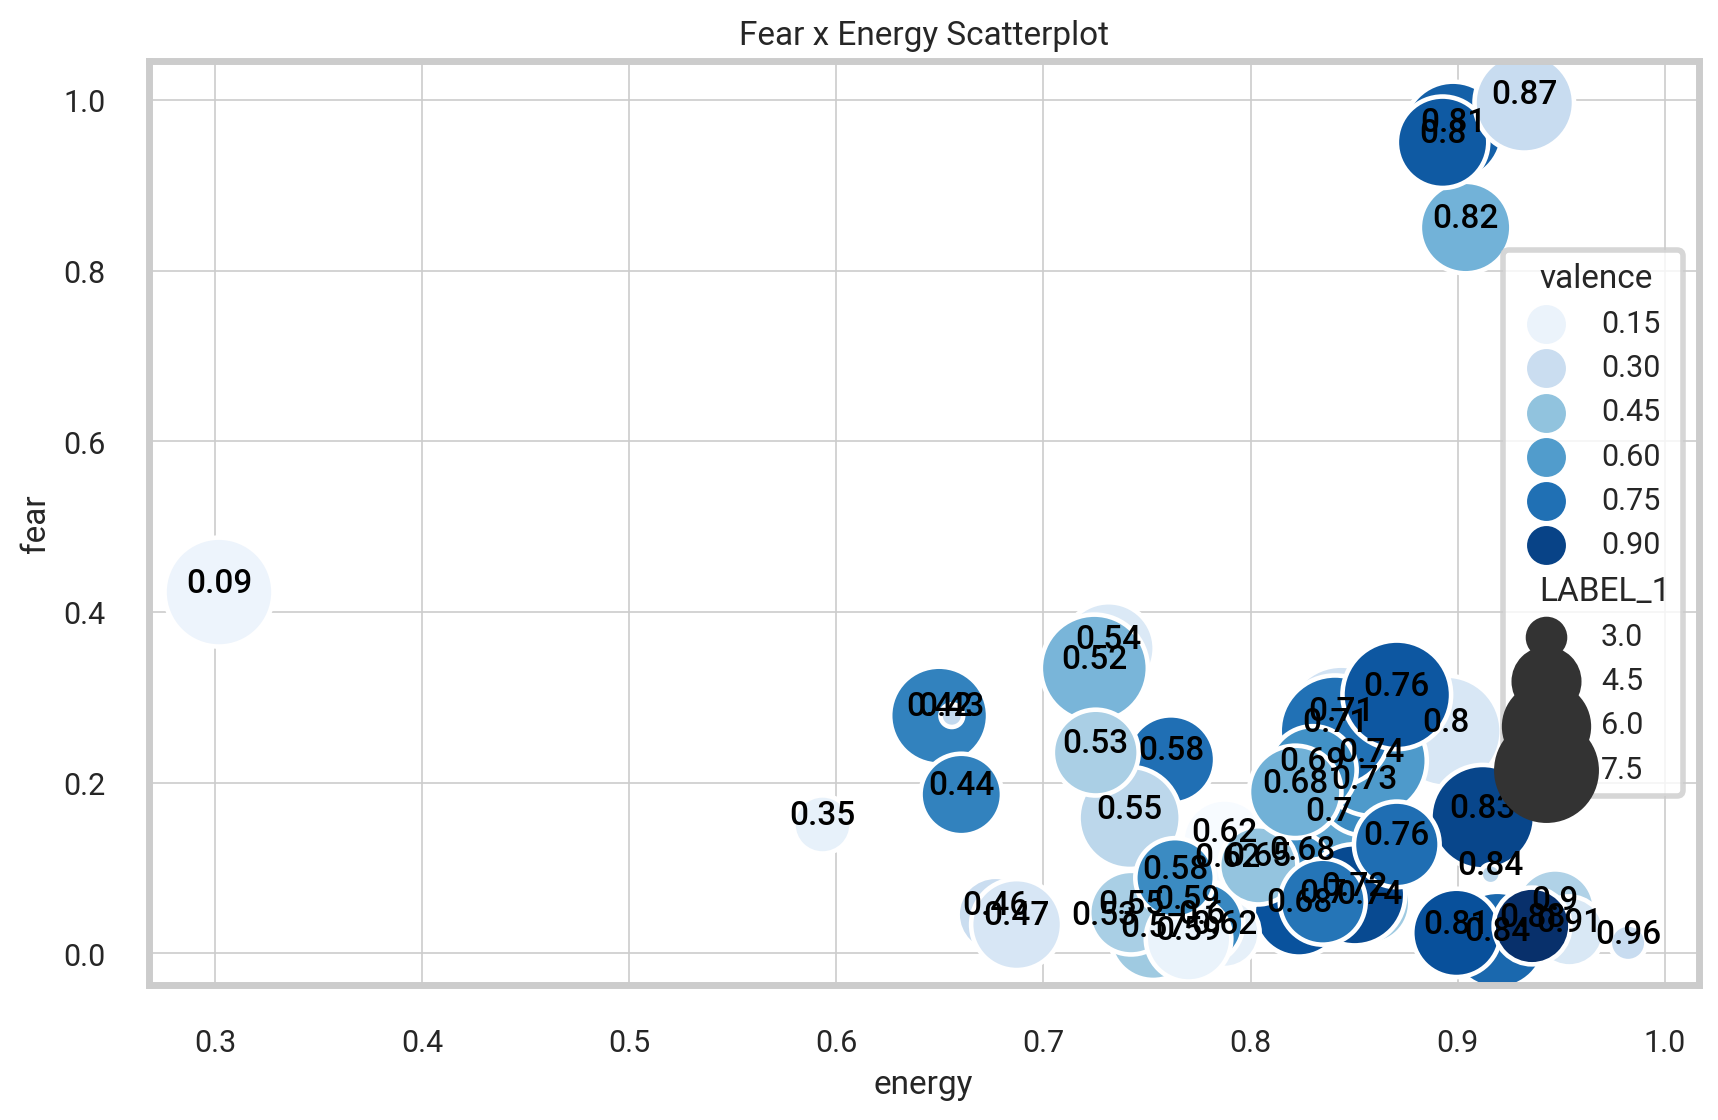

In [82]:
fig = plt.figure(figsize = (10,6), dpi=100)
# Create scatterplot. alpha controls the opacity and s controls the size.
ax = sns.scatterplot(x=track_sentiment_df['energy']**0.5, y=track_sentiment_df['fear']**0.5,
               size=track_sentiment_df['LABEL_1']*10, hue=track_sentiment_df['valence'],
               sizes=(20,1600),
               palette='Blues')
#For each point, we add a text inside the bubble
for line in range(0,track_sentiment_df.shape[0]):
     ax.text(track_sentiment_df.energy[line]**0.5, track_sentiment_df.fear[line]**0.5, 
             round(track_sentiment_df.energy[line], 2), 
             horizontalalignment='center', size='medium', color='black', weight='semibold')
        
title = 'Fear x Energy Scatterplot'
plt.title(title)
#plt.savefig(title, dpi=400)
plt.show()

Text(0.5, 1.0, 'Fear vs. Energy')

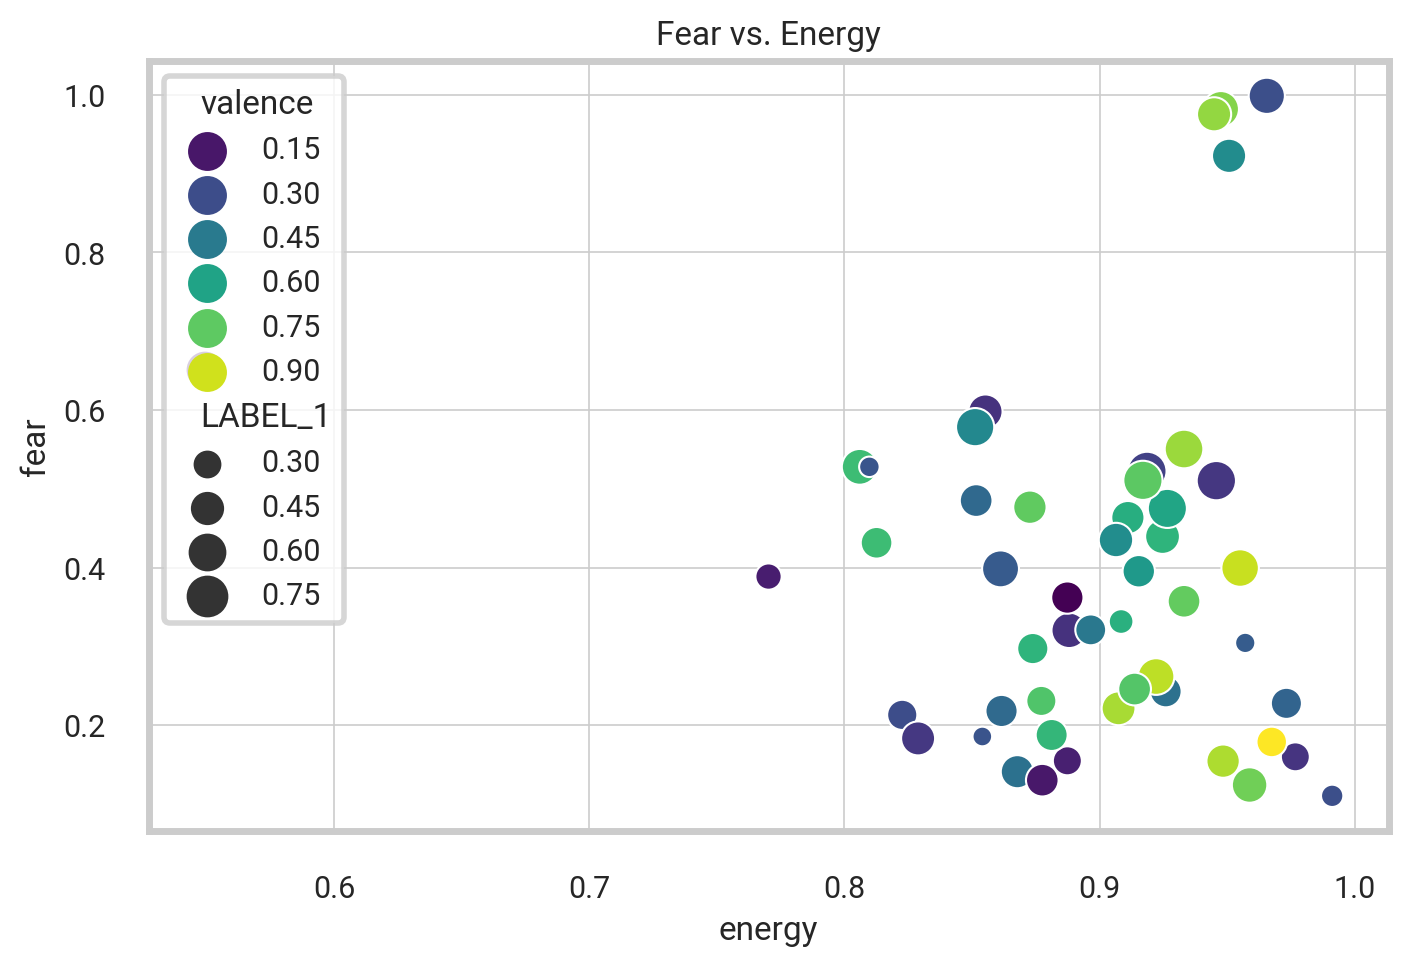

In [83]:
plot = sns.scatterplot(x = track_sentiment_df['energy']**0.25, 
                       y = track_sentiment_df['fear']**0.25,
                       hue = track_sentiment_df['valence'],
                       size = track_sentiment_df['LABEL_1'],
                       sizes = (50, 200),
                       size_order = track_sentiment_df['LABEL_1'],
                       palette = 'viridis')
plot.set_title('Fear vs. Energy')


------

In [84]:

X_SMALL = df_final[['acousticness', 'danceability', 'energy', 'speechiness', 'tempo', 'valence', 
          'sadness', 'joy', 'love', 'anger', 'fear', 'surprise', 'track_name', 'NEGATIVE', 'POSITIVE']]

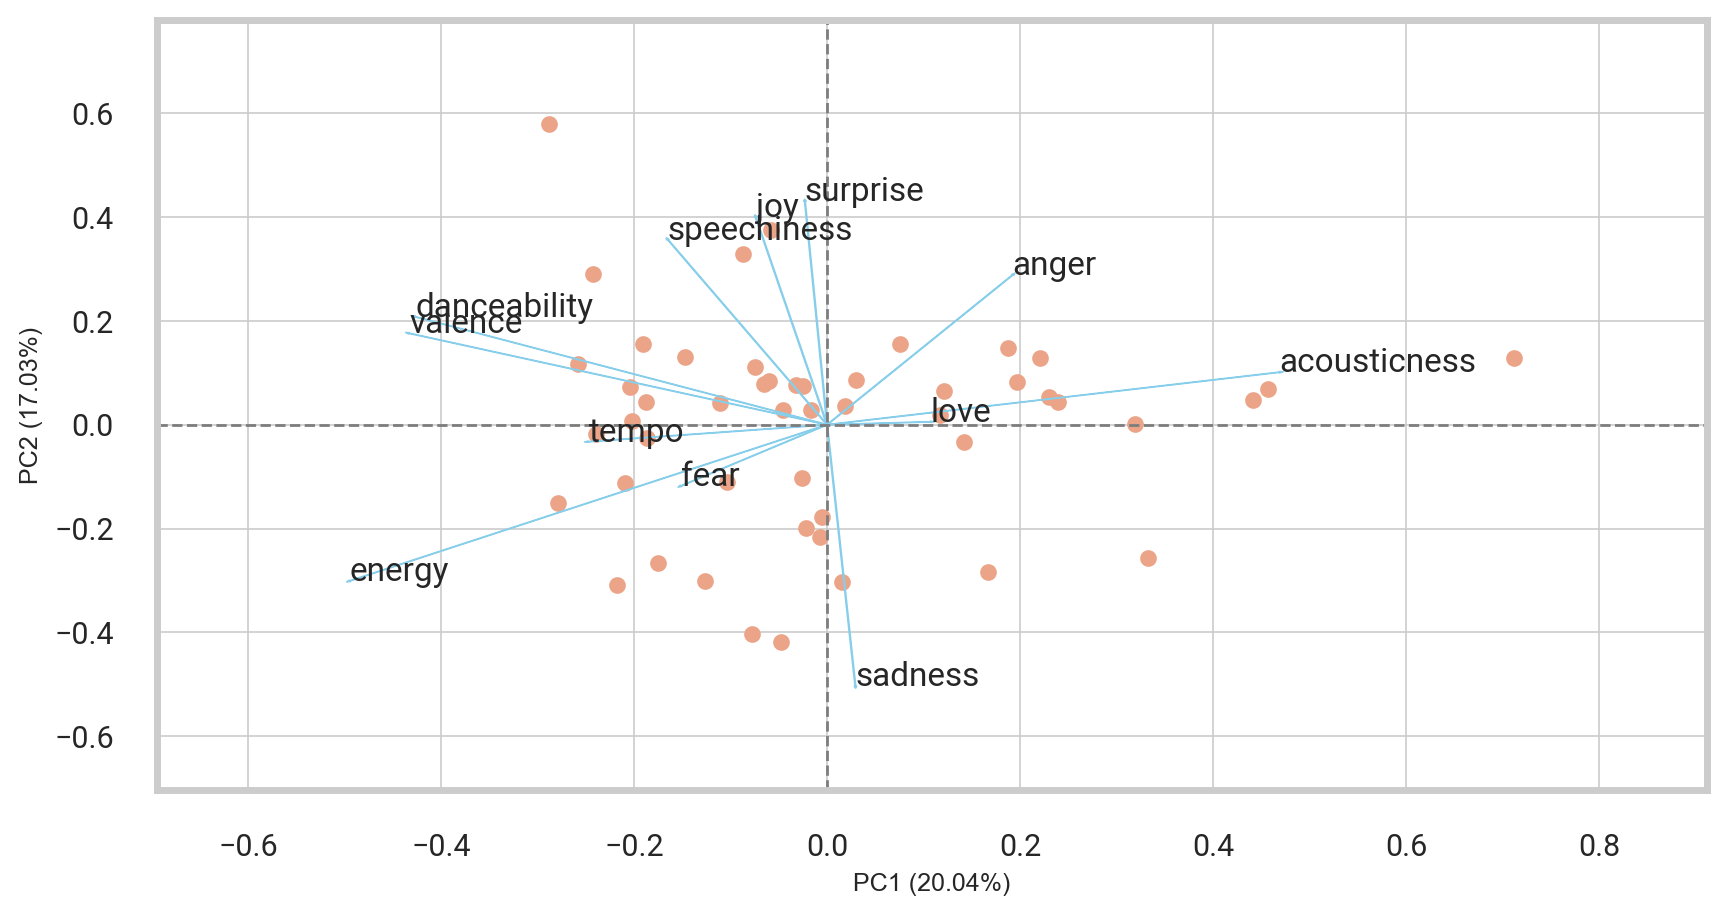

In [85]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from bioinfokit.visuz import cluster

X_i = X_SMALL.iloc[:,0:12]
target = X_SMALL['track_name'].to_numpy()
X_st =  StandardScaler().fit_transform(X_i)
pca_out = PCA().fit(X_st)

# component loadings
loadings = pca_out.components_
#loadings

# get eigenvalues (variance explained by each PC)  
pca_out.explained_variance_

# get biplot
pca_scores = PCA().fit_transform(X_st)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=X_i.columns.values, 
               var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
               var2=round(pca_out.explained_variance_ratio_[1]*100, 2), #colorlist=target,
               show=True,dim=(10,5),dotsize=16)




In [86]:
#pca = PCA()

#X_i = X_SMALL.iloc[:,0:12]
#X_st =  StandardScaler().fit_transform(X_i)
#pca_out = PCA().fit(X_st)


#data_pca = pca.fit_transform(X_SMALL)
# data_pca[:12]

pca_scores = PCA().fit_transform(X_st)
# pca_scores

df_pca = pd.DataFrame(pca_scores)
df_pca.head()

cols_pca = [f'PC{i}' for i in range(1, pca_out.n_components_+1)]
cols_pca

df_pca = pd.DataFrame(pca_scores, columns=cols_pca, index=X_i.index)
df_pca.head(3)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  5.270466  0.948505  0.355184  0.899354 -1.575176  0.187153 -0.694101   
1  0.868476  0.136365 -1.759115 -0.582333  0.832087 -0.285042  0.571442   
2 -0.340464  0.211398  0.746624  0.272780  1.084102 -2.222116  0.174974   

        PC8       PC9      PC10      PC11          PC12  
0  0.246583 -0.259509  0.387764 -0.552148 -2.119118e-08  
1 -0.345819 -0.837761  0.658721 -0.620495  1.514414e-07  
2  0.812164 -0.097380  0.662247  0.090877 -1.242305e-07

You can see the following array, where every element represents the amount of variability explained by every component.

In [87]:
print(pca_out.explained_variance_ratio_)
print('----')
print(pca_out.explained_variance_ratio_.cumsum())

[2.00390189e-01 1.70288991e-01 1.34383910e-01 1.02941653e-01
 9.50028960e-02 8.51572329e-02 6.81063737e-02 5.82327024e-02
 4.89924478e-02 2.36001092e-02 1.29034951e-02 5.87961257e-16]
----
[0.20039019 0.37067918 0.50506309 0.60800474 0.70300764 0.78816487
 0.85627125 0.91450395 0.9634964  0.9870965  1.         1.        ]


Relationship between Original Variables & Components
Loading Vectors
The Principal Components are produced by a mathematical equation, which is composed of the following weights:

In [88]:
df_weights = pd.DataFrame(pca_out.components_.T, columns=df_pca.columns, index=X_i.columns)
df_weights


PC1       PC2       PC3       PC4       PC5       PC6  \
acousticness  0.468724  0.101178 -0.154943  0.095117 -0.245359 -0.120015   
danceability -0.426649  0.208069  0.332417 -0.063468 -0.091243  0.299193   
energy       -0.494327 -0.300872 -0.156752  0.035209 -0.027445 -0.041468   
speechiness  -0.164882  0.356519  0.470527 -0.159030  0.122572 -0.231263   
tempo        -0.247246 -0.032713 -0.205444  0.158888  0.459133 -0.571742   
valence      -0.432923  0.176206 -0.064601 -0.004597 -0.181024 -0.099021   
sadness       0.029325 -0.503645  0.338576 -0.371437 -0.180604 -0.083098   
joy          -0.074055  0.400435 -0.554874 -0.306828  0.056751  0.068051   
love          0.107100  0.005575  0.147944  0.178263  0.702311  0.496282   
anger         0.192255  0.288664  0.354063  0.237633  0.039010 -0.443503   
fear         -0.151217 -0.117818 -0.014168  0.779859 -0.253008  0.097645   
surprise     -0.022961  0.430670  0.056360  0.081186 -0.278405  0.200308   

                   PC7       PC8       PC9      PC10      PC11          PC12  
acousticness -0.536767 -0.115434  0.070889 -0.338117  0.491538 -1.295545e-09  
danceability -0.089844 -0.259745  0.015869 -0.686241 -0.124855  9.798790e-09  
energy        0.264895  0.231243  0.131833 -0.122816  0.693345  2.512555e-08  
speechiness  -0.113832 -0.195934 -0.451256  0.342349  0.397910  1.174216e-08  
tempo        -0.317057  0.223821 -0.221113 -0.288377 -0.223564 -8.562726e-09  
valence      -0.468560 -0.067845  0.589186  0.391578 -0.100676 -2.421501e-08  
sadness      -0.246487  0.201408 -0.040182 -0.014708 -0.082324 -5.860299e-01  
joy           0.136655 -0.154038 -0.099726 -0.018589  0.032253 -6.087316e-01  
love         -0.225293  0.116611  0.211828  0.070765  0.180095 -2.205194e-01  
anger         0.403239  0.054367  0.461177 -0.147253  0.019369 -3.152212e-01  
fear         -0.042092 -0.195516 -0.287340  0.136712 -0.045777 -3.714501e-01  
surprise     -0.077765  0.808438 -0.161244 -0.005079 -0.030064 -6.814124e-03

--------------

## Spotify Songs - Similarity Search




Below, we create a query to retrieve similar elements based on Euclidean distance. In mathematics, the Euclidean distance between two points is the length of the line segment between the two points. In this sense, the closer the distance is to 0, the more similar the songs are.



#### [KNN Algorithm](https://www.kaggle.com/code/leomauro/spotify-songs-similarity-search/notebook)


The k-Nearest Neighbors (KNN) algorithm searches for k similar elements based on a query point at the center within a predefined radius. 



In [89]:
# Get a song string search
def getMusicName(elem):
    return f"{elem['artist']} - {elem['name']}"

def knnQuery(queryPoint, arrCharactPoints, k):
    queryVals = queryPoint.tolist()
    distVals = []
    
    # Copy of dataframe indices and data
    tmp = arrCharactPoints.copy(deep = True)  
    for index, row in tmp.iterrows():
        feat = row.values.tolist()
        
        # Calculate sum of squared differences
        ssd = sum(abs(feat[i] - queryVals[i]) ** 2 for i in range(len(queryVals)))
        
        # Get euclidean distance
        distVals.append(ssd ** 0.5)
        
    tmp['distance'] = distVals
    tmp = tmp.sort_values('distance')
    
    # K closest and furthest points
    return tmp.head(k).index, tmp.tail(k).index


# Execute KNN removing the query point
def querySimilars(df, columns, idx, func, param):
    arr = df[columns].copy(deep = True)
    queryPoint = arr.loc[idx]
    arr = arr.drop([idx])
    return func(queryPoint, arr, param)

**KNN Query Example.** 

Our function allows us to create personalized query points and modify the columns to explore other options. For example, the following code selects a specific set of song attributes and then searches for the $k$ highest values of these attributes set equal to one.

Let's search for  $k=3$  similar songs to a query point $\textrm{songIndex} = 6$. 

In [90]:
from sklearn import preprocessing 

scaler=preprocessing.MinMaxScaler() #instantiate a scaler
# all the feature values are in the range [0,1] ,except of loudnes
# so let's scale it to fit the exact same range
loudness2 = df["loudness"].values
loudness_scaled=scaler.fit_transform(loudness2.reshape(-1, 1))
df['loudness_scaled'] = loudness_scaled

In [91]:
# Select song and column attributes
songIndex = 4 # query point
columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 
           'loudness_scaled', 'tempo', 
           'speechiness', 'valence']

# Set query parameters
func, param = knnQuery,3

# Implement query
response = querySimilars(df, columns, songIndex, func, param)

print("---- Query Point ----")
print(getMusicName(df.loc[songIndex]))
print('---- k = 3 similar songs ----')
for track_id in response[0]:
    track_name = getMusicName(df.loc[track_id])
    print(track_name)
print('---- k = 3 nonsimilar songs ----')
for track_id in response[1]:
    track_name = getMusicName(df.loc[track_id])
    print(track_name)

---- Query Point ----
Dua Lipa - Dance The Night (From Barbie The Album)
---- k = 3 similar songs ----
Dominic Fike - Mona Lisa (Spider-Man: Across the Spider-Verse)
Ed Sheeran - Eyes Closed
Rema - Calm Down (with Selena Gomez)
---- k = 3 nonsimilar songs ----
Doechii - What It Is (Solo Version)
Harry Styles - As It Was
Morgan Wallen - Last Night


The code below implements the same idea as above, but queries each track in a given playlist instead of a single defined query point.

In [92]:
similar_count = {} # Similar songs count
nonsimilar_count = {} # Non-similar songs count

for track_index in df.index:
    # Implement query
    response = querySimilars(df, columns, track_index, func, param)
    
    # Get similar songs
    for similar_index in response[0]:
        track = getMusicName(df.loc[similar_index])
        if track in similar_count:
            similar_count[track] += 1
        else:
            similar_count[track] = 1
    
    # Get non-similar songs
    for nonsimilar_index in response[1]:
        track = getMusicName(df.loc[nonsimilar_index])
        if track in nonsimilar_count:
            nonsimilar_count[track] += 1
        else:
            nonsimilar_count[track] = 1

In [93]:
nonsimilar = dict(sorted(nonsimilar_count.items(), key=lambda item: item[1], reverse=True))
print('---- NON SIMILAR SONG COUNTS ----')
for track_name, track_count in nonsimilar.items():
    if track_count >= 8:
        print(track_name, ':', track_count)

similar = dict(sorted(similar_count.items(), key=lambda item: item[1], reverse=True))
print('\n---- SIMILAR SONG COUNTS ----')
for track_name, track_count in similar.items():
    if track_count >= 5:
        print(track_name, ':', track_count)

---- NON SIMILAR SONG COUNTS ----
Morgan Wallen - Last Night : 43
The Weeknd - Die For You - Remix : 31
Billie Eilish - What Was I Made For? [From The Motion Picture "Barbie"] : 26
Harry Styles - As It Was : 24
Doechii - What It Is (Solo Version) : 19

---- SIMILAR SONG COUNTS ----
SZA - Kill Bill : 5
OneRepublic - I Ain't Worried : 5
Quevedo - Columbia : 5
Nicki Minaj - Barbie World (with Aqua) [From Barbie The Album] : 5
Sam Smith - Unholy (feat. Kim Petras) : 5
Gunna - fukumean : 5
The Weeknd - Popular (with Playboi Carti & Madonna) - Music from the HBO Original Series : 5


----------------------

## Organized Songs in a Playlist

In [94]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, decomposition

In [95]:
songs = df[['name','acousticness', 'danceability', 'energy', 'instrumentalness', 
            'liveness', 'speechiness', 'tempo', 'valence',  'loudness_scaled']]
songs.describe()



acousticness  danceability     energy  instrumentalness   liveness  \
count     50.000000     50.000000  50.000000         50.000000  50.000000   
mean       0.262214      0.669240   0.659022          0.025725   0.177190   
std        0.244049      0.114132   0.165292          0.096359   0.122158   
min        0.001260      0.444000   0.091100          0.000000   0.032200   
25%        0.065750      0.563500   0.555000          0.000000   0.097025   
50%        0.174500      0.671000   0.679500          0.000008   0.115000   
75%        0.430500      0.759000   0.787250          0.000162   0.244250   
max        0.959000      0.916000   0.965000          0.629000   0.563000   

       speechiness       tempo    valence  loudness_scaled  
count    50.000000   50.000000  50.000000        50.000000  
mean      0.076142  125.244800   0.511538         0.784102  
std       0.067282   27.035927   0.246883         0.162872  
min       0.025400   66.900000   0.096900         0.000000  
25%       0.035225  102.642250   0.304500         0.704982  
50%       0.049200  127.992000   0.508500         0.823084  
75%       0.081850  140.853000   0.730500         0.872186  
max       0.327000  203.853000   0.964000         1.000000

In [96]:
labels = songs.values[:,0]
X = songs.values[:,1:10]
kmeans = cluster.AffinityPropagation(preference=-200)
kmeans.fit(X)

AffinityPropagation(preference=-200)

In [97]:
predictions = {}
for p,n in zip(kmeans.predict(X),labels):
    if not predictions.get(p):
        predictions[p] = []
        
    predictions[p] += [n]

for p in predictions:
    print("Category",p)
    print("-----")
    for n in predictions[p]:
        print(n)
    print("")

Category 0
-----
What Was I Made For? [From The Motion Picture "Barbie"]
Kill Bill
Attention
LALA
Karma

Category 4
-----
vampire
WHERE SHE GOES
Barbie World (with Aqua) [From Barbie The Album]
Super Shy
Calling (Spider-Man: Across the Spider-Verse) (Metro Boomin & Swae Lee, NAV, feat. A Boogie Wit da Hoodie)
All My Life (feat. J. Cole)
Moonlight
Snooze
I Ain't Worried
Ella Baila Sola
Nonsense
Miracle (with Ellie Goulding)
Sprinter

Category 5
-----
Cruel Summer
As It Was
Chemical
What It Is (Solo Version)

Category 3
-----
Popular (with Playboi Carti & Madonna) - Music from the HBO Original Series
Columbia
Creepin' (with The Weeknd & 21 Savage)
Fast Car
Until I Found You (with Em Beihold) - Em Beihold Version
golden hour
Say Yes To Heaven

Category 6
-----
Dance The Night (From Barbie The Album)
Flowers
Calm Down (with Selena Gomez)
Eyes Closed
CUFF IT
Mona Lisa (Spider-Man: Across the Spider-Verse)

Category 2
-----
fukumean
Seven (feat. Latto) (Explicit Ver.)
Cupid - Twin Ver.
Peopl

------------------------------

#### K Means Clustering


Using K Means clustering, I will be choosing to [break my playlist into 3 smaller playlists](https://github.com/ankushbharadwaj/reorganize-my-spotify-playlist/blob/master/reorder%20my%20spotify%20playlist.ipynb).



In [98]:
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline
playlist_tracks = df[['artist','name','acousticness','danceability','energy',
                      'liveness', 'instrumentalness','speechiness','valence']]

kmeans = KMeans(n_clusters = 3)
kmeans.fit(playlist_tracks.drop(['artist', 'name'], axis = 1))

KMeans(n_clusters=3)

<AxesSubplot:ylabel='count'>

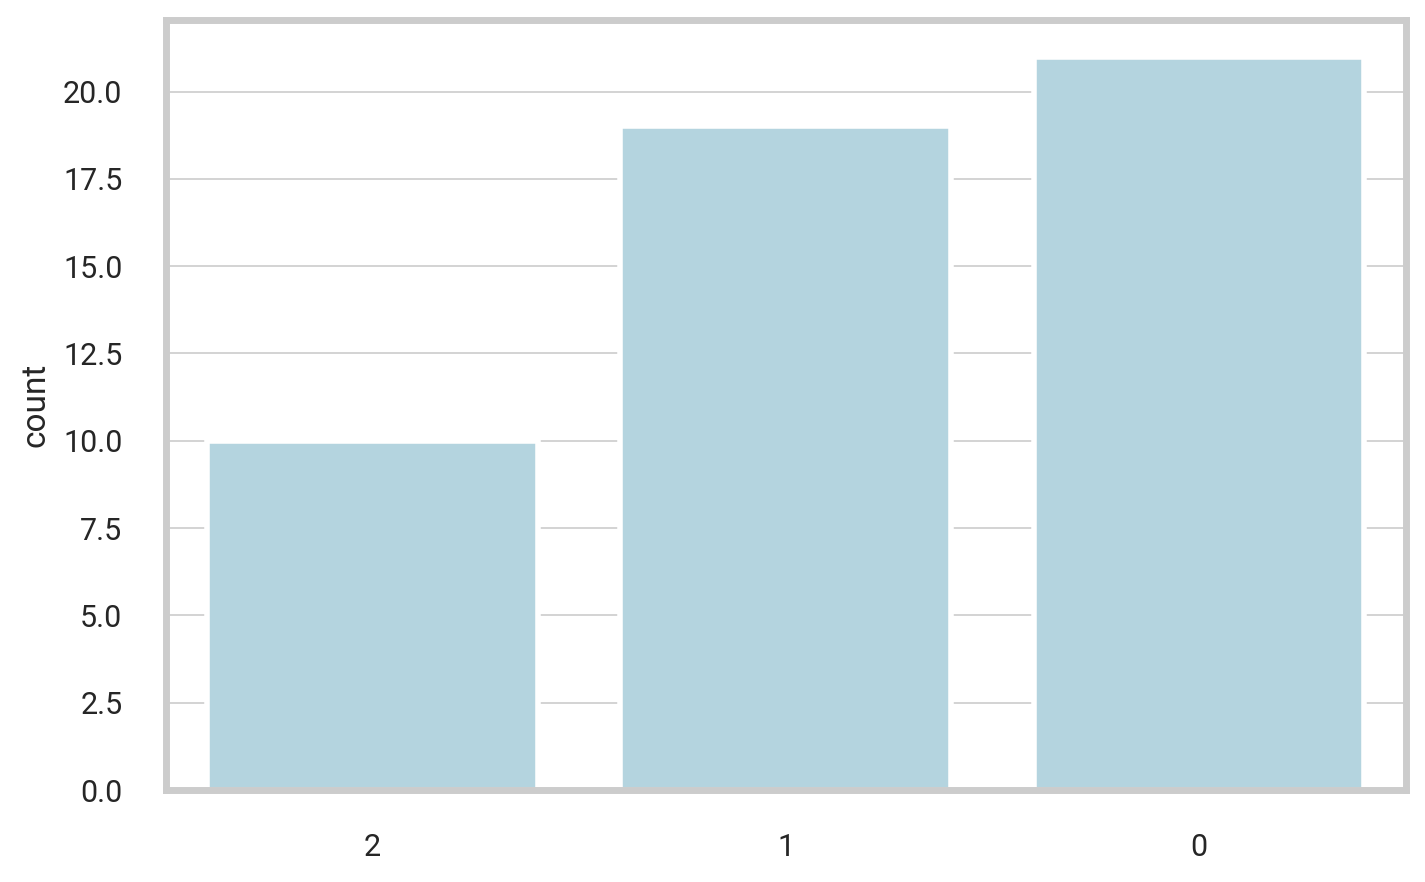

In [99]:
sns.countplot(x=[str(group) for group in kmeans.labels_], color = 'lightblue')

#### Visualizing the Clusters


Moving forward, let's look at differences in the audio features of each group.



In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(playlist_tracks.drop(['artist', 'name'], axis = 1))
scaled_data = scaler.transform(playlist_tracks.drop(['artist', 'name'], axis = 1))

Text(0, 0.5, 'PC2: 0.206')

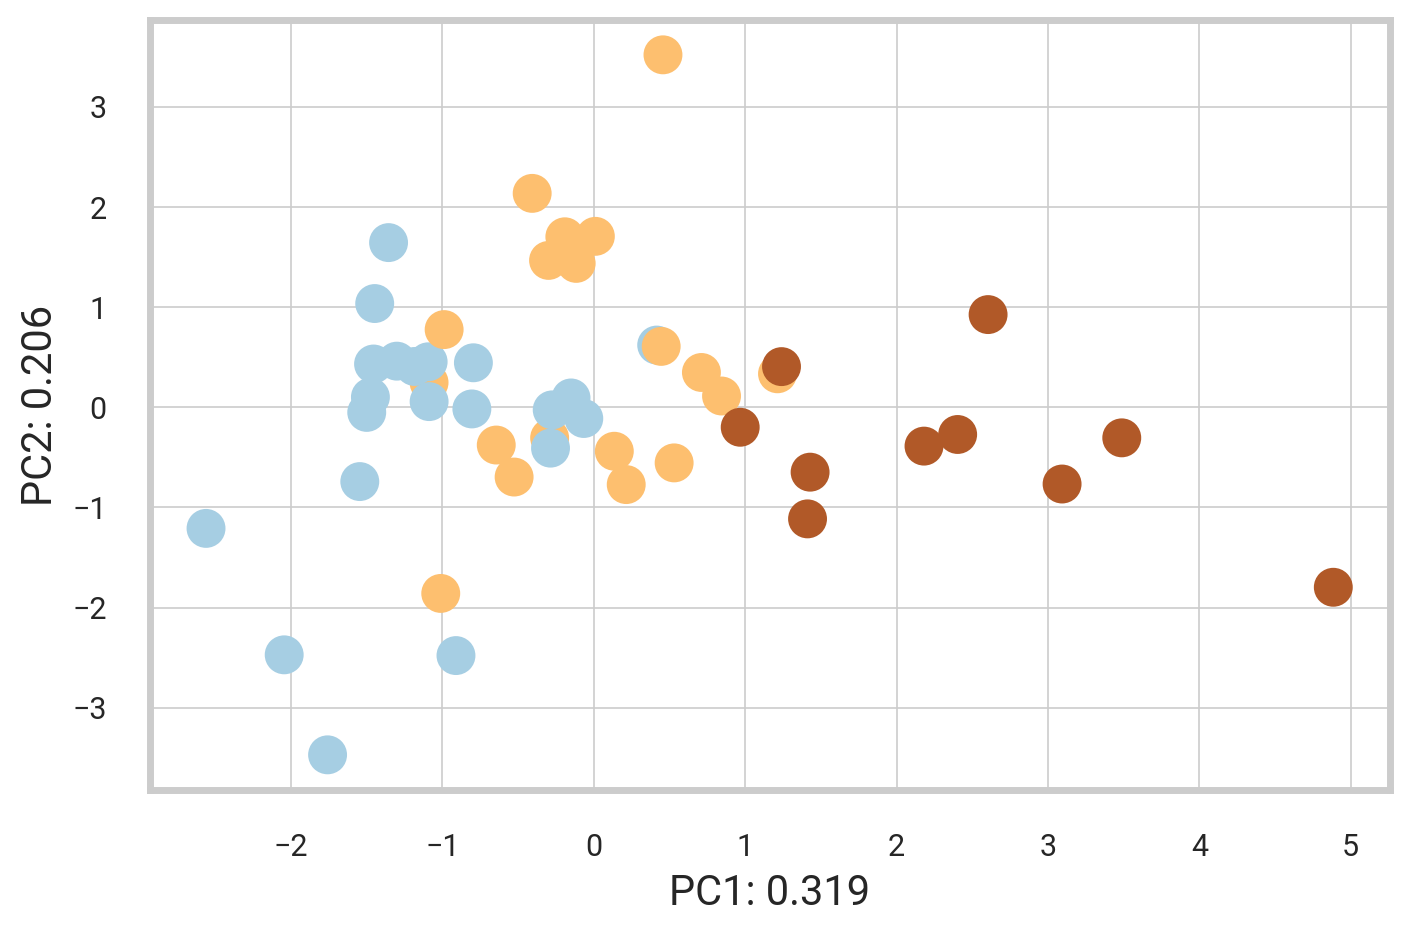

In [101]:
from sklearn.decomposition import PCA
pca = PCA(n_components =2)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)

plt.scatter(data_pca[:,0], data_pca[:,1], c = list(kmeans.labels_), cmap = 'Paired')
plt.xlabel('PC1: {:.3f}'.format(pca.explained_variance_ratio_[0]), size = 15)
plt.ylabel('PC2: {:.3f}'.format(pca.explained_variance_ratio_[1]), size = 15)

Text(0, 0.5, 'PC2: 0.206')

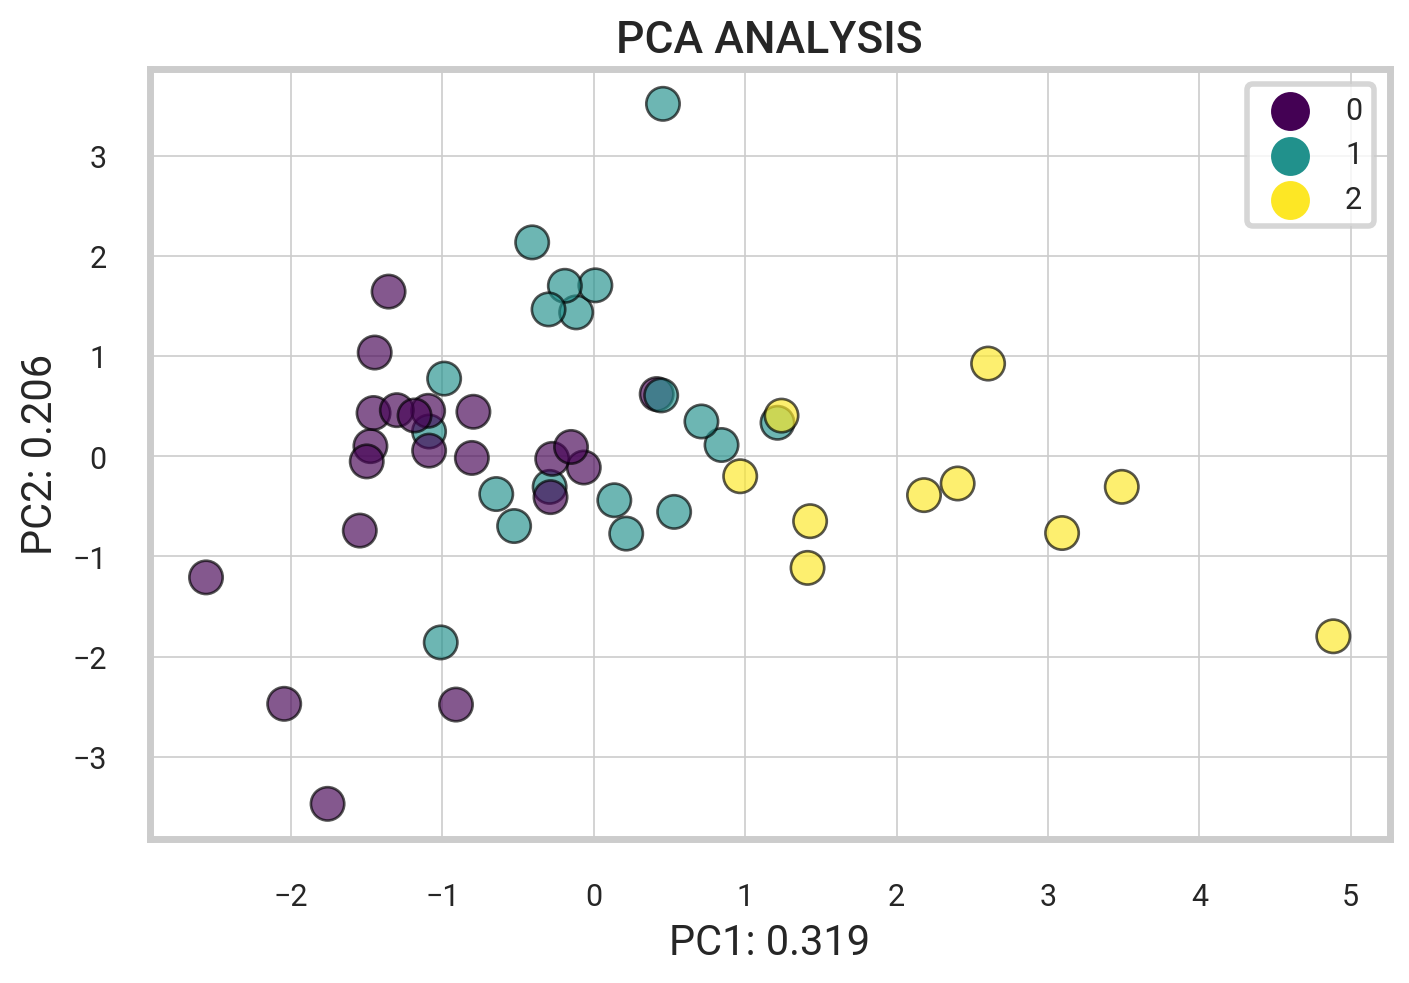

In [102]:
plot = sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue = list(kmeans.labels_),
                       alpha = 0.66, 
                       #size = data_pca[:,1], sizes = (50,200),
                       palette = 'viridis', edgecolor = 'black', cmap='Paired')
plot.set_title('PCA ANALYSIS', size = 16, weight='bold')

plt.xlabel('PC1: {:.3f}'.format(pca.explained_variance_ratio_[0]), size = 15)
plt.ylabel('PC2: {:.3f}'.format(pca.explained_variance_ratio_[1]), size = 15)


In [103]:
playlist_tracks['group'] = list(kmeans.labels_)
playlist_tracks = playlist_tracks.astype({'group': str})

means = pd.DataFrame(index = range(0,3), 
                    columns = list(playlist_tracks[playlist_tracks['group'] == '0'].describe().loc['mean'].index))
means.iloc[0] = playlist_tracks[playlist_tracks['group'] == '0'].describe().loc['mean']
means.iloc[1] = playlist_tracks[playlist_tracks['group'] == '1'].describe().loc['mean']
means.iloc[2] = playlist_tracks[playlist_tracks['group'] == '2'].describe().loc['mean']
means

c:\Users\Hannah Luebbering\.conda\envs\cse160\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



acousticness danceability    energy  liveness instrumentalness speechiness  \
0     0.211471     0.738905  0.710381  0.182595         0.009162    0.089543   
1     0.121411     0.654211  0.700368  0.194463         0.044511    0.079705   
2       0.6363       0.5515   0.47261   0.13302         0.024815     0.04123   

    valence  
0  0.760476  
1  0.346205  
2    0.3029